# Teclo Churn EDA

## Stakeholder Questions
1. What is the overall churn rate?
2. Which segments churn the most?
3. How does tenure relate to churn?
4. How do contract type and payment method affect churn?
5. What are the biggest early warning signals of churn?

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

df = pd.read_csv("../data/raw/telco_churn.csv")
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [13]:
# Standard churn flag for analysis and modeling
df["churn_flag"] = df["Churn Value"].astype(int)


In [7]:
df.shape

(7043, 33)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [9]:
df.isna().sum().sort_values(ascending=False).head(15)

Churn Reason      5174
CustomerID           0
Count                0
State                0
Country              0
Zip Code             0
Lat Long             0
Latitude             0
City                 0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
dtype: int64

In [10]:
df.duplicated().sum()


np.int64(0)

## Data Sanity Check Summary

- Dataset has **7,043 customer records** and **33 features**, showing a pretty good sized customer base suitable for both analysis and modeling.
- No duplicate records were detected.
- The majority of features are categorical, with a smaller number of nueric fields such as tenure, monthly charges, and geo coordinates.
- Missing values are heavily concentraded in the **Churn Reason** field, which is expected since this information is only populated for customers who have churned.
- All core customer attributes required for churn modeling (tenure, contract type, service usage, charges) are complete and usable.

**Implication:**
The dataset is clean enough to proceed directly into segmentation, feauture engineering, and modeling without requiring extensive data cleaning. The Churn Reason field will be treated as an exploratory or post-churn diagnostic variable rather than a predictive feature.

In [14]:
## Churn By Contract

churn_by_contract = (
    df.groupby("Contract")["churn_flag"]
        .mean()
        .sort_values(ascending=False)
)
churn_by_contract

Contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: churn_flag, dtype: float64

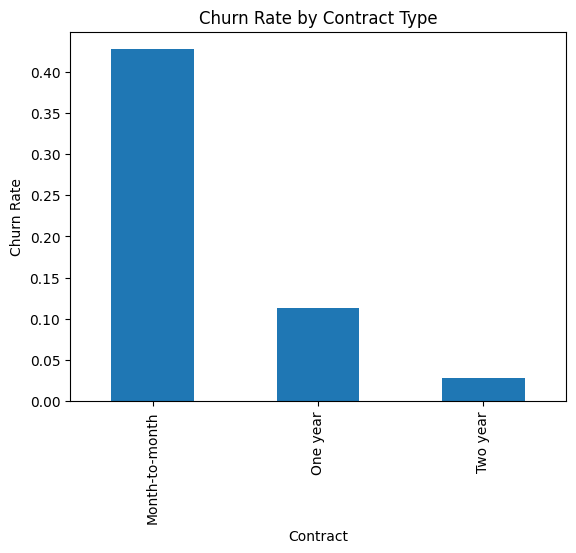

In [19]:
churn_by_contract.plot(kind="bar")
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate")
plt.xlabel("Contract")
plt.show()

**Insight:**
Month-to-month customers exhibit an extremely high churn rate (~43%) compared to one-year (~11%) and two-year (~3%) contracts. This indicates that contract length is a primary driver of churn and represents a major oppurtunity for retention methods, such as incentivizing contract upgrades.

In [18]:
## Churn by payment method

churn_by_payment = (
    df.groupby("Payment Method")["churn_flag"]
        .mean()
        .sort_values(ascending=False)
)

churn_by_payment


Payment Method
Electronic check             0.452854
Mailed check                 0.191067
Bank transfer (automatic)    0.167098
Credit card (automatic)      0.152431
Name: churn_flag, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

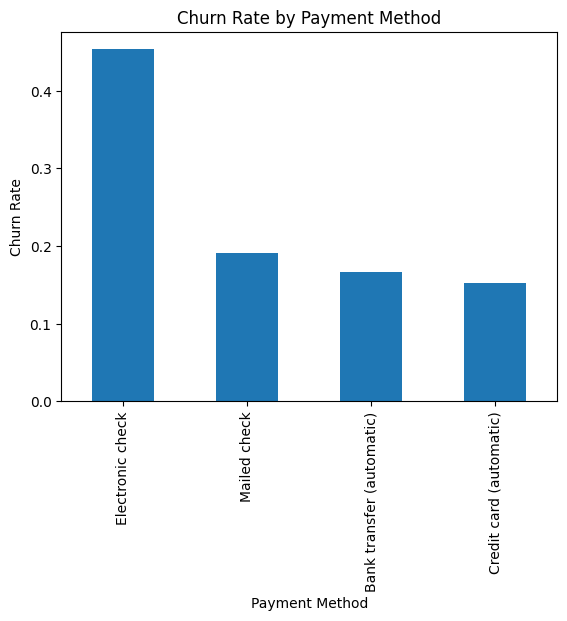

In [20]:
churn_by_payment.plot(kind="bar")
plt.title("Churn Rate by Payment Method")
plt.ylabel("Churn Rate")
plt.show

**Insights:**
Customers using electronic checks exhibit the highest churn rate (~45%), significantly exceeding all other payment methods. In contrast, customers enrolled in automatic payments have the lowest churn rates (~15-17%). This suggests that payment automation is strongly associated with customer retention and represents a high-impact lever for churn reduction initiatives.

In [21]:
##Tenure Buckets

df["tenure_bucket"] = pd.cut(
    df["Tenure Months"],
    bins=[-1, 3, 12, 24, 1000],
    labels=["0–3 months", "4–12 months", "13–24 months", "25+ months"]
)



In [ ]:
#Churn by tenure

churn_by_tenure = (
    df.groupby("tenure_bucket")["churn_flag"]
      .mean()
      .sort_values(ascending=False)
)

churn_by_tenure

C:\Users\athir\AppData\Local\Temp\ipykernel_1568\3446685069.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("tenure_bucket")["churn_flag"]


tenure_bucket
0–3 months      0.562147
4–12 months     0.391459
13–24 months    0.287109
25+ months      0.140360
Name: churn_flag, dtype: float64

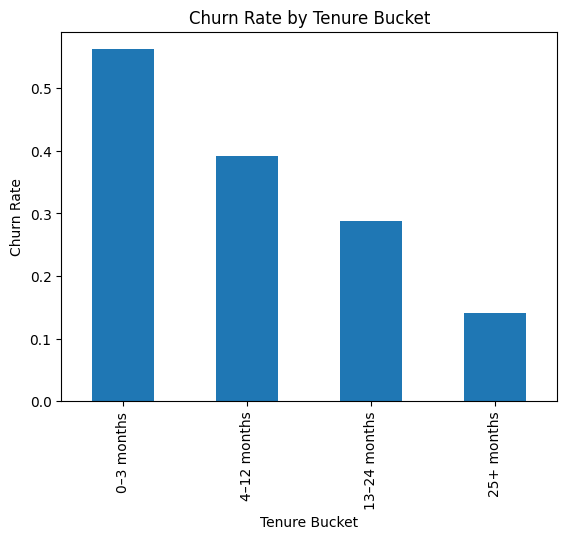

In [23]:
churn_by_tenure.plot(kind="bar")
plt.title("Churn Rate by Tenure Bucket")
plt.ylabel("Churn Rate")
plt.xlabel("Tenure Bucket")
plt.show()


**Insight:**  
Churn risk is heavily concentrated in the early stages of the customer lifecycle. Customers in their first 0–3 months show the highest churn rate (~56%), with churn declining steadily as tenure increases. Long-tenure customers (25+ months) exhibit significantly lower churn (~14%), indicating strong customer stickiness. This highlights early onboarding and engagement as critical levers for churn reduction.


In [24]:
## Converting total charges to numeric

df["Total Charges"] = pd.to_numeric(
    df["Total Charges"], errors="coerce"
)

df[["Monthly Charges", "Total Charges"]].describe()


,Monthly Charges,Total Charges
count,7043.000000,7032.000000
mean,64.761692,2283.300441
std,30.090047,2266.771362
min,18.250000,18.800000
25%,35.500000,401.450000
50%,70.350000,1397.475000
75%,89.850000,3794.737500
max,118.750000,8684.800000


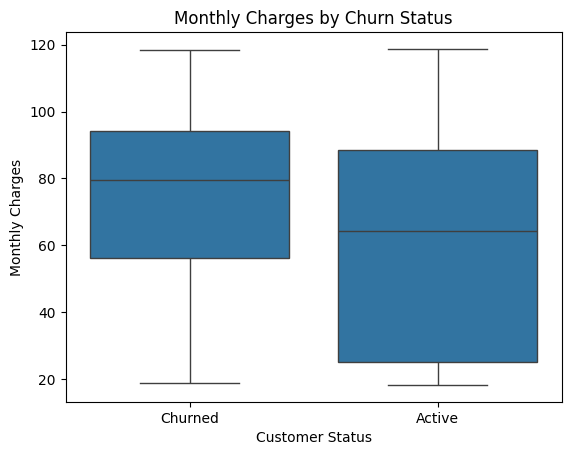

In [25]:
sns.boxplot(
    x=df["churn_flag"].map({0: "Active", 1: "Churned"}),
    y=df["Monthly Charges"]
)
plt.title("Monthly Charges by Churn Status")
plt.xlabel("Customer Status")
plt.ylabel("Monthly Charges")
plt.show()


In [27]:
df.groupby("churn_flag")["Monthly Charges"].mean()


churn_flag
0    61.265124
1    74.441332
Name: Monthly Charges, dtype: float64

**Insight:**  
Customers who churn have meaningfully higher monthly charges than active customers. On average, churned customers pay approximately $74 per month compared to about $61 for active customers. This indicates that revenue at risk is concentrated among higher-paying customers, suggesting that pricing sensitivity and perceived value play an important role in churn. Retention efforts focused on high-charge customers could therefore deliver outsized revenue impact.


## EDA Summary

- **Overall churn rate:** ~26% of customers have churned.
- **Highest-risk segments:**  
  - Customers on **month-to-month contracts**  
  - Customers using **electronic check** as a payment method  
  - **Early-tenure customers**, especially those in their first 0–3 months
- **Lifecycle insight:**  
  Churn risk is front-loaded. Customers in their first three months show the highest churn (~56%), with churn declining steadily as tenure increases. Long-tenure customers (25+ months) exhibit strong retention.
- **Revenue risk insight:**  
  Churned customers have higher monthly charges on average (~$74) compared to active customers (~$61), indicating that revenue at risk is concentrated among higher-paying customers.
- **Actionable levers:**  
  - Early onboarding and engagement in the first 90 days  
  - Contract migration incentives for month-to-month customers  
  - Pricing or value reinforcement for high-charge, high-risk customers
- **Next step:**  
  Load cleaned data into PostgreSQL and build KPI queries for churn rate, customers at risk, and revenue at risk to support stakeholder dashboards and retention decision-making.
